In [53]:
# Random Forest Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data = pd.read_csv("Company_Data.csv")

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data.shape

(400, 11)

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
# Convert 'Sale' variable to categorical
def categorize_sales(Sales):
    if Sales <= 6:
        return 'Low'
    elif Sales <= 12:
        return 'Medium'
    else:
        return 'High'

company_data['Sales_Category'] = company_data['Sales'].apply(categorize_sales)

In [10]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [11]:
company_data['Sales_Category'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [12]:
# Drop the original 'Taxable.Income' column
company_data.drop(columns=['Sales'], axis = 1,inplace=True)

In [13]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [14]:
company_data['Sales_Category'] = company_data['Sales_Category'].replace({'High': 2, 'Medium': 1, 'Low': 0})

In [15]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,0


In [16]:
company_data.Sales_Category.value_counts()

Sales_Category
1    243
0    130
2     27
Name: count, dtype: int64

In [17]:
company_data['ShelveLoc'] = company_data['ShelveLoc'].replace({'Good': 2, 'Medium': 1, 'Bad': 0})

In [18]:
company_data.ShelveLoc.value_counts()

ShelveLoc
1    219
0     96
2     85
Name: count, dtype: int64

In [19]:
company_data['Urban'] = company_data['Urban'].replace({'Yes': 1, 'No': 0})

In [20]:
company_data['US'] = company_data['US'].replace({'Yes': 1, 'No': 0})

In [21]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,2,65,10,1,1,1
2,113,35,10,269,80,1,59,12,1,1,1
3,117,100,4,466,97,1,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,0


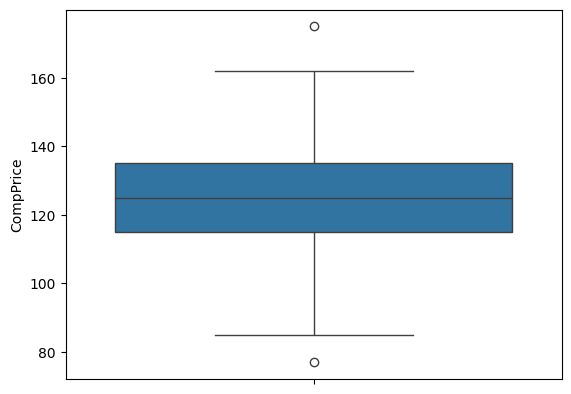

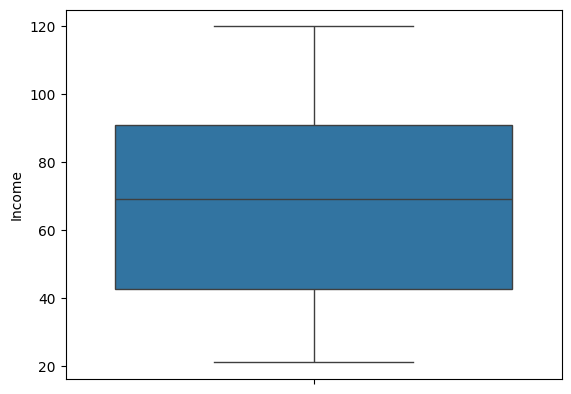

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=company_data['CompPrice'])
plt.show()

sns.boxplot(data=company_data['Income'])
plt.show()

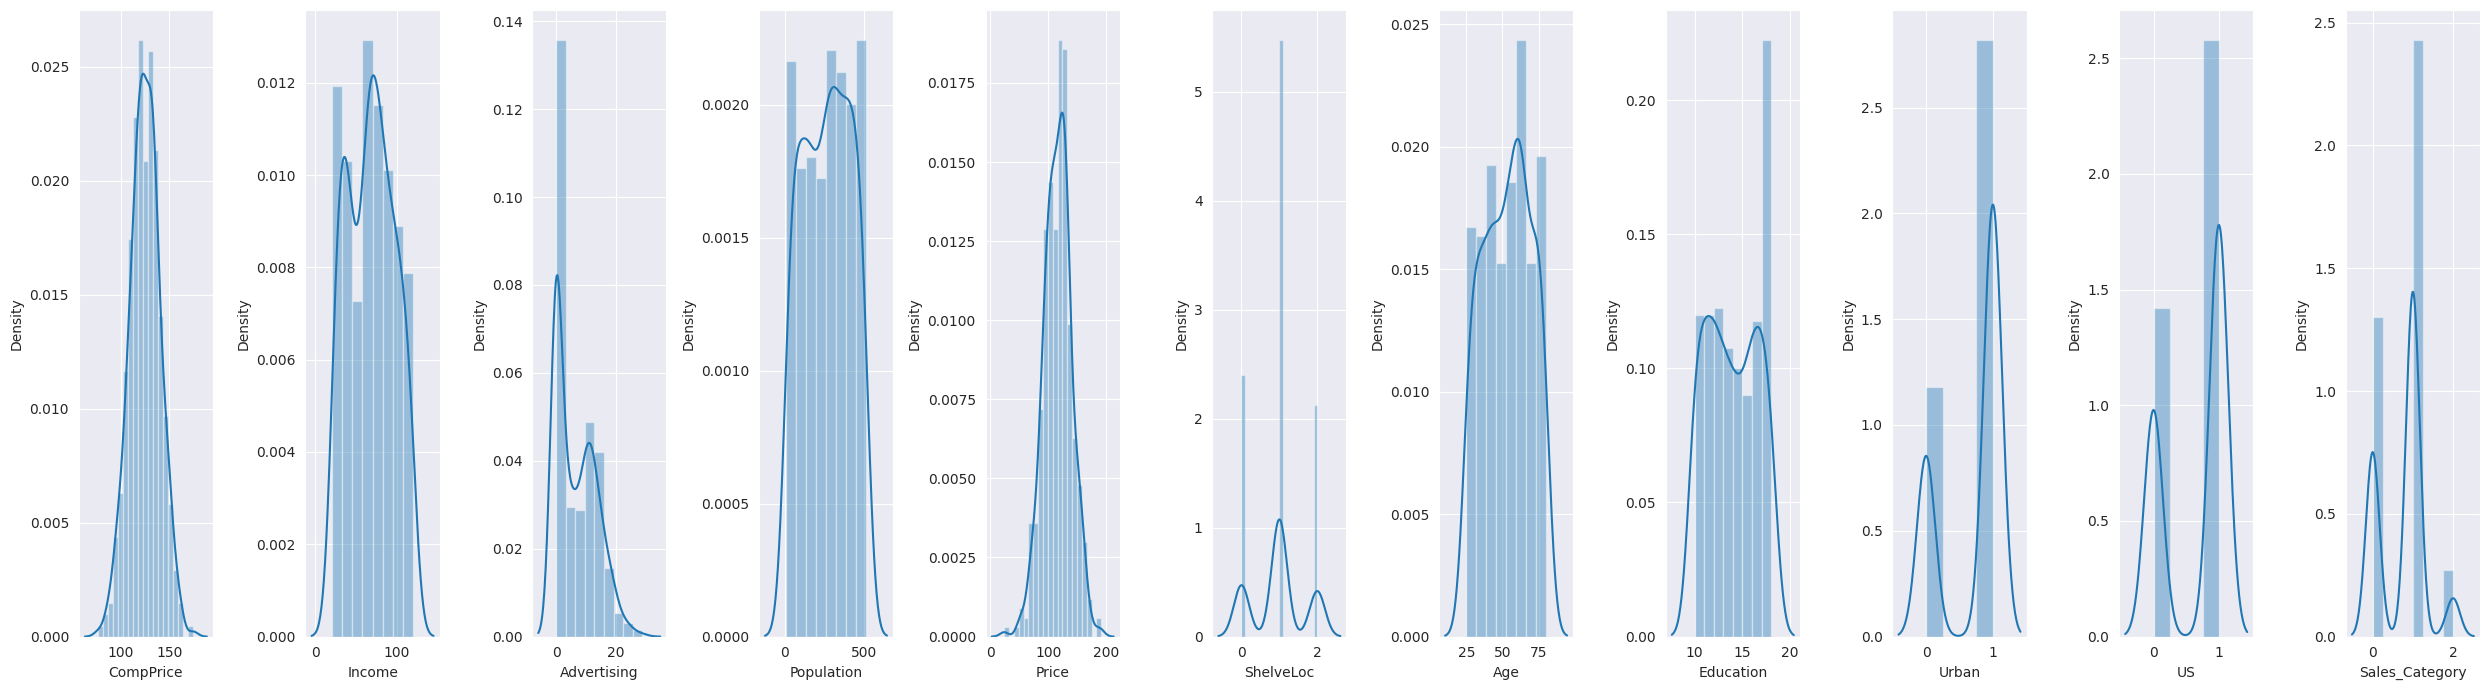

In [54]:
fig, ax = plt.subplots(1, 11, figsize=(25,7))
sns.distplot(company_data.CompPrice, ax=ax[0])
sns.distplot(company_data.Income, ax=ax[1])
sns.distplot(company_data.Advertising, ax=ax[2])
sns.distplot(company_data.Population, ax=ax[3])
sns.distplot(company_data.Price, ax=ax[4])
sns.distplot(company_data.ShelveLoc, ax=ax[5])
sns.distplot(company_data.Age, ax=ax[6])
sns.distplot(company_data.Education, ax=ax[7])
sns.distplot(company_data.Urban, ax=ax[8])
sns.distplot(company_data.US, ax=ax[9])
sns.distplot(company_data.Sales_Category, ax=ax[10])
plt.tight_layout()
plt.show()

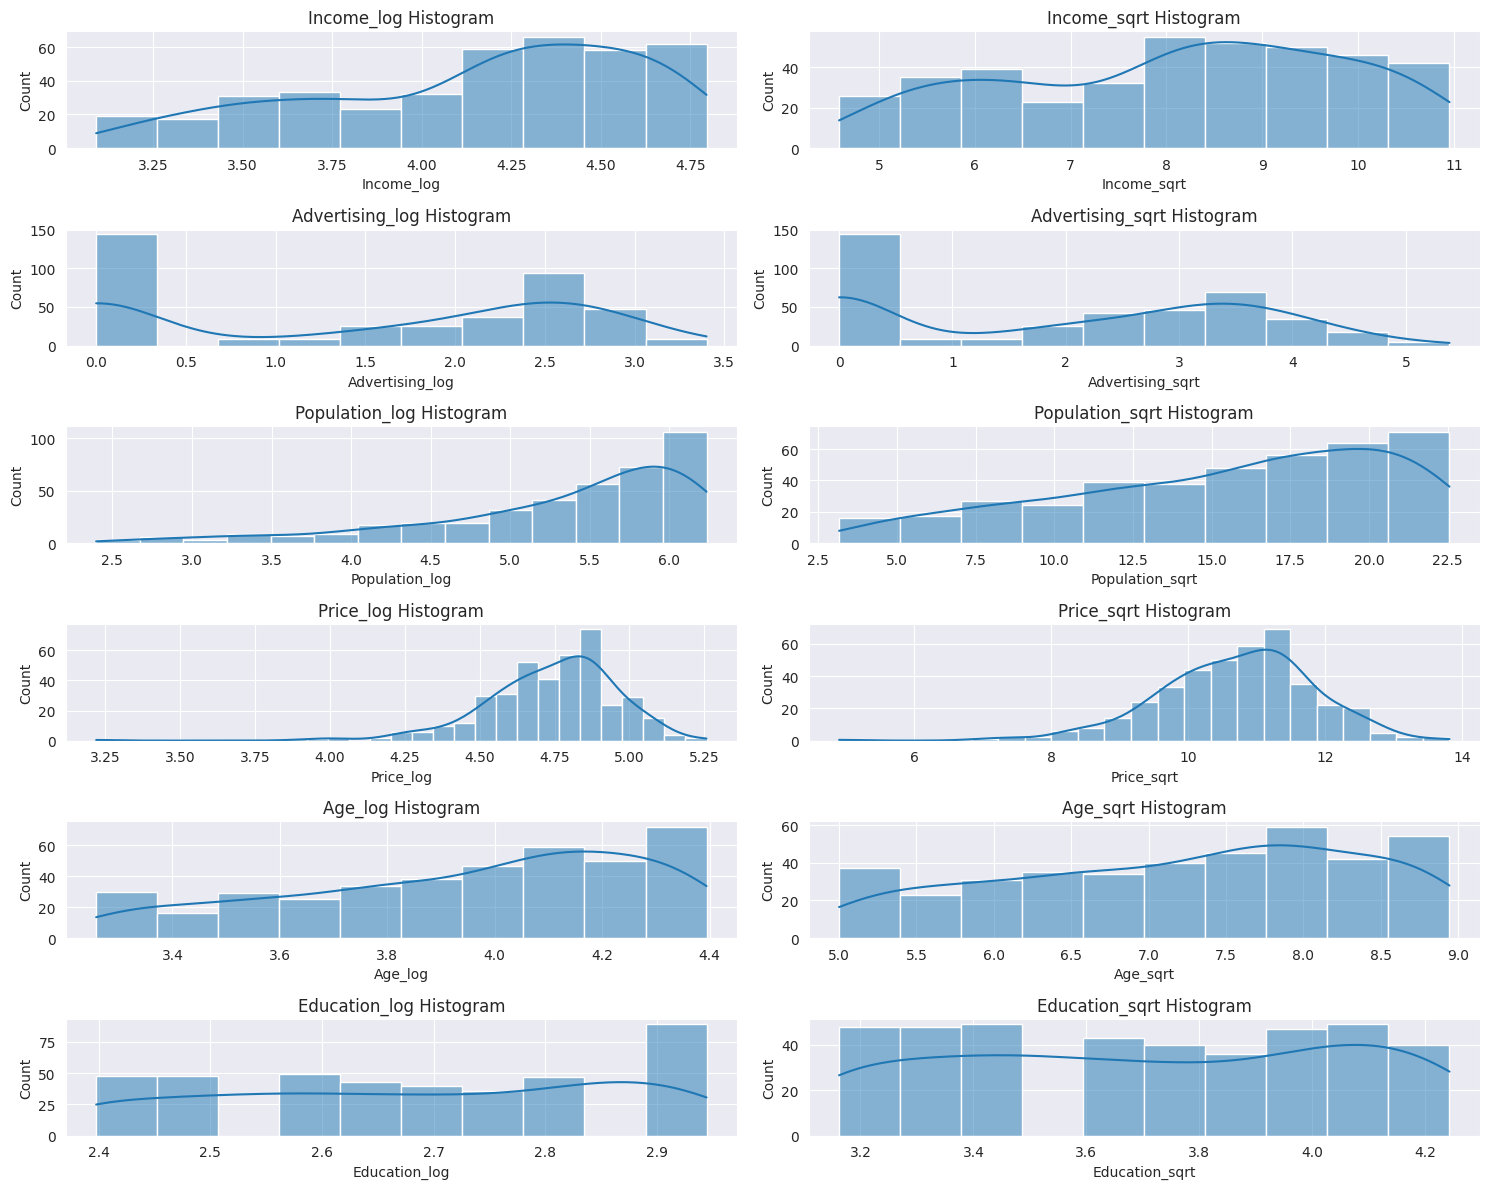

Shapiro-Wilk test for Income_log: p-value = 6.129323611159254e-12
Shapiro-Wilk test for Income_sqrt: p-value = 2.514488173233076e-09
Shapiro-Wilk test for Advertising_log: p-value = 6.109165436127044e-21
Shapiro-Wilk test for Advertising_sqrt: p-value = 6.246790954805921e-19
Shapiro-Wilk test for Population_log: p-value = 3.852319079002359e-18
Shapiro-Wilk test for Population_sqrt: p-value = 1.3161837938979737e-11
Shapiro-Wilk test for Price_log: p-value = 2.9260077433895804e-12
Shapiro-Wilk test for Price_sqrt: p-value = 1.486490509705618e-05
Shapiro-Wilk test for Age_log: p-value = 7.543901267559328e-12
Shapiro-Wilk test for Age_sqrt: p-value = 3.58011759127308e-10
Shapiro-Wilk test for Education_log: p-value = 1.7074894016061437e-13
Shapiro-Wilk test for Education_sqrt: p-value = 2.561582944458213e-13


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Select the continuous variables to transform
continuous_cols = [ 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

# Apply transformations to the selected variables
transformed_data = company_data.copy()  # Create a copy of the original data
for col in continuous_cols:
    transformed_data[col + '_log'] = np.log1p(transformed_data[col])  # Log transformation
    transformed_data[col + '_sqrt'] = np.sqrt(transformed_data[col])  # Square root transformation

# Plot histograms for transformed variables
fig, axes = plt.subplots(len(continuous_cols), 2, figsize=(15, 2 * len(continuous_cols)))
for i, col in enumerate(continuous_cols):
    sns.histplot(transformed_data[col + '_log'], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(col + '_log Histogram')

    sns.histplot(transformed_data[col + '_sqrt'], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(col + '_sqrt Histogram')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for transformed variables
for col in continuous_cols:
    _, p_log = stats.shapiro(transformed_data[col + '_log'])
    _, p_sqrt = stats.shapiro(transformed_data[col + '_sqrt'])
    print(f'Shapiro-Wilk test for {col + "_log"}: p-value = {p_log}')
    print(f'Shapiro-Wilk test for {col + "_sqrt"}: p-value = {p_sqrt}')


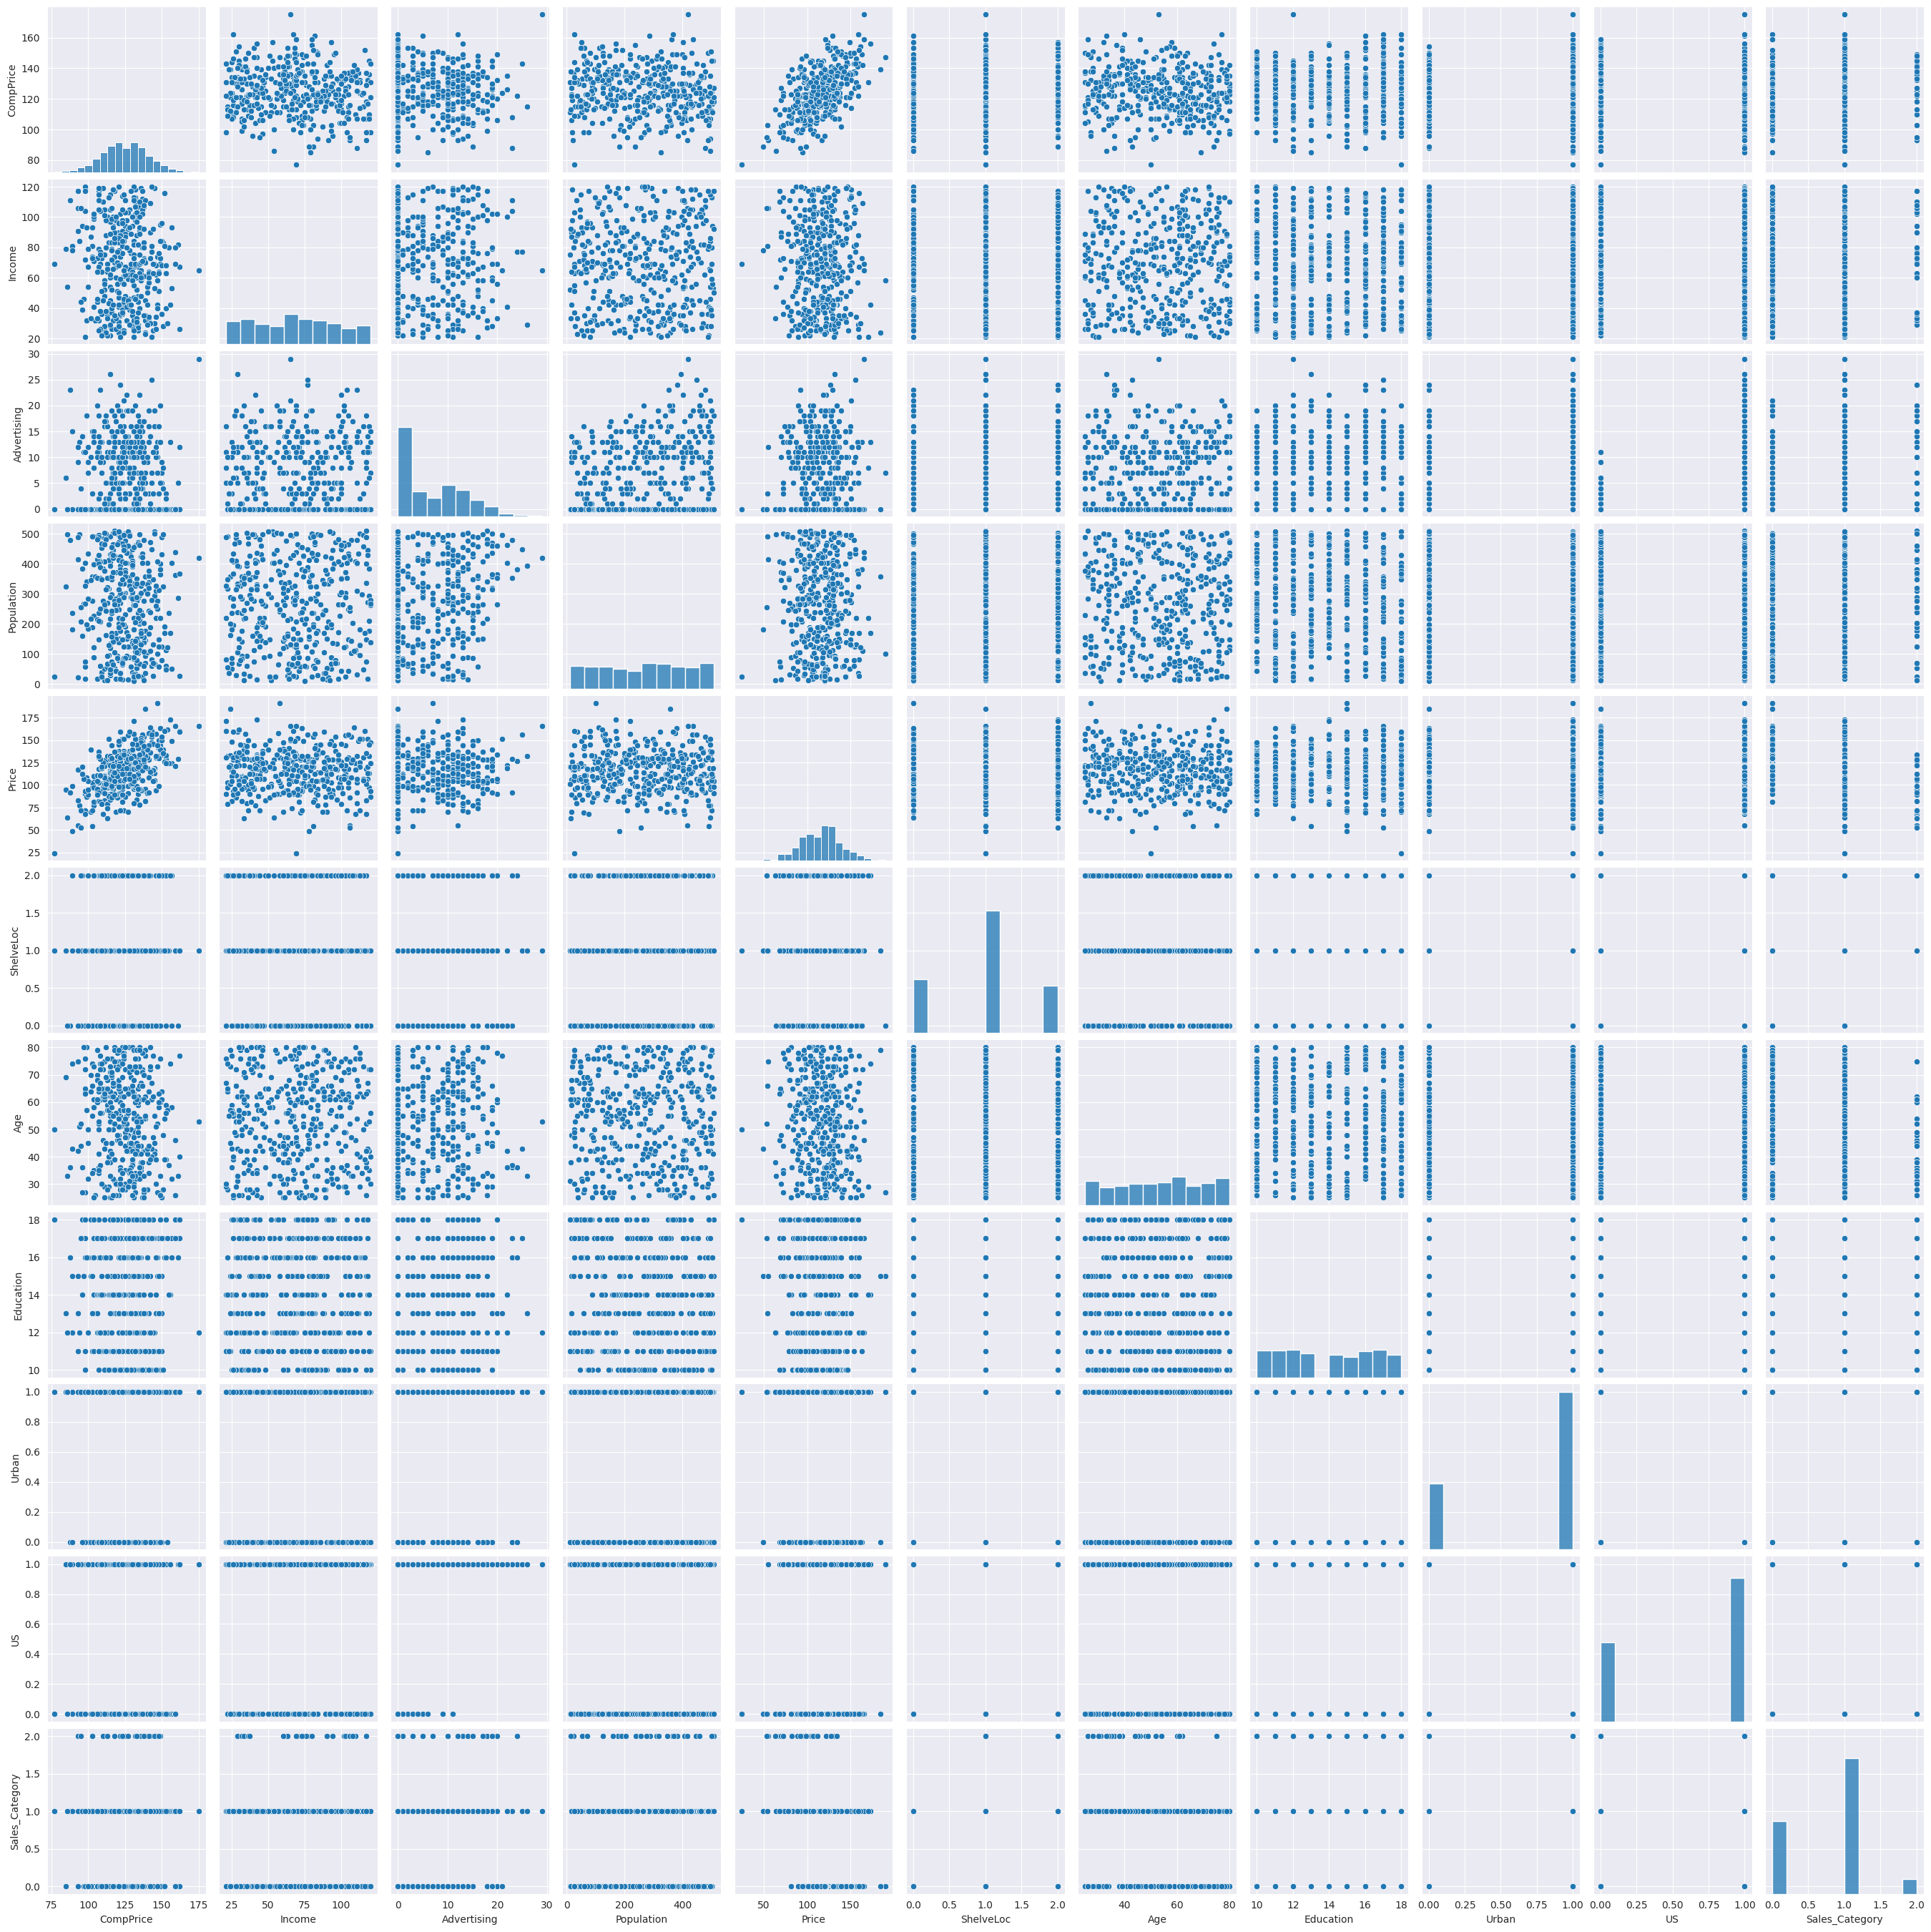

In [43]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(company_data)

In [45]:
transformed_data.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,...,Advertising_log,Advertising_sqrt,Population_log,Population_sqrt,Price_log,Price_sqrt,Age_log,Age_sqrt,Education_log,Education_sqrt
0,138,73,11,276,120,0,42,17,1,1,...,2.484907,3.316625,5.624018,16.613248,4.795791,10.954451,3.761200,6.480741,2.890372,4.123106
1,111,48,16,260,83,2,65,10,1,1,...,2.833213,4.000000,5.564520,16.124515,4.430817,9.110434,4.189655,8.062258,2.397895,3.162278


<Axes: xlabel='Sales_Category', ylabel='count'>

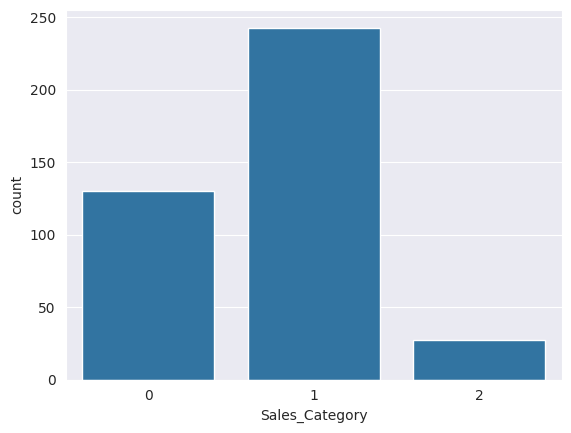

In [44]:
# Create countplot
sns.countplot(x='Sales_Category', data=company_data)

<Axes: >

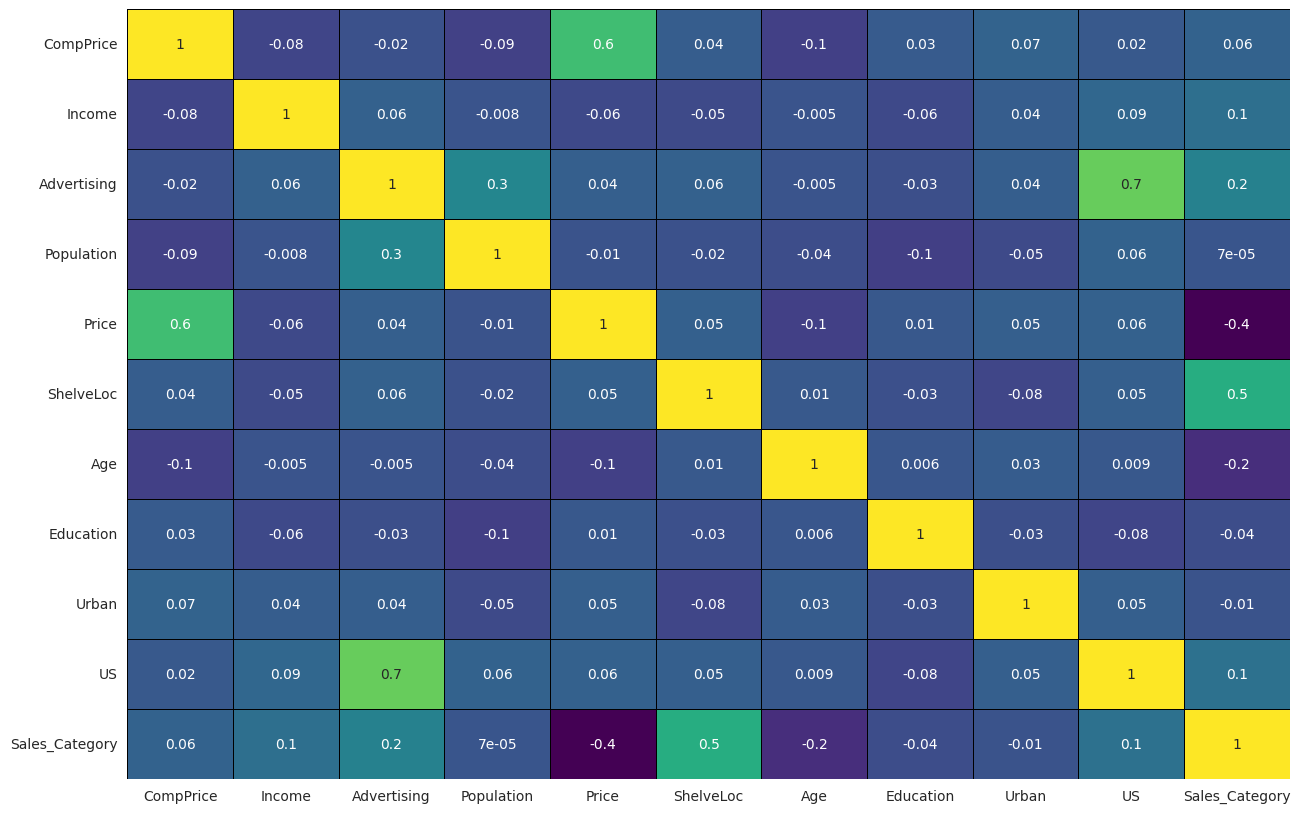

In [37]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(company_data.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [46]:
# Split data into features and target variable
X = transformed_data.drop(columns=['Sales_Category'])
y =transformed_data['Sales_Category']

In [50]:
num_trees = 130
max_features = 3
kfold = KFold(n_splits=8, random_state=33, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=33)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.72


In [55]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score

# Define parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',  # Set objective to 'multiclass'
    'num_classes': 3,  # Number of classes in your target variable y
    'metric': 'multi_error',  # Change the metric as needed
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Define number of trees and max features
num_trees = 150
max_features = 3

# Define k-fold cross-validation
kfold = KFold(n_splits=8, random_state=33, shuffle=True)

# Initialize LGBM model
model = lgb.LGBMClassifier(n_estimators=num_trees, max_features=max_features, **params)

# Perform cross-validation
results = cross_val_score(model, X, y, cv=kfold)

# Print mean accuracy
print(results.mean())


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [52]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

# Define parameters
params = {
    'objective': 'multi:softmax',  # Set objective to 'multi:softmax'
    'num_class': 3,  # Number of classes in your target variable y
    'eval_metric': 'merror',  # Change the metric as needed
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Define number of trees and max features
num_trees = 150
max_features = 3

# Define k-fold cross-validation
kfold = KFold(n_splits=8, random_state=33, shuffle=True)

# Initialize XGB model
model = xgb.XGBClassifier(n_estimators=num_trees, max_features=max_features, **params)

# Perform cross-validation
results = cross_val_score(model, X, y, cv=kfold)

# Print mean accuracy
print(results.mean())


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:24:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:24:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:24:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:24:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:24:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.



0.7775000000000001
